<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/main/assignment_2/Part1/CS_GY6613_AI1_Assignment2_Banani_Ghosh_bg2502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 :
## Part 1: Neural Network optimization with SGD and Adam

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer


In [3]:
(x_train, y_train_bow), (x_test, y_test_bow) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=10000,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)

In [4]:
print(x_train.shape, y_train_bow.shape, x_test.shape, y_test_bow.shape)

(25000,) (25000,) (25000,) (25000,)


# Create the BoW feature vectors (10 points)

Create the word vectors using Bag of Words (BoW) representation. You can use the following code to get the BoW representation of the dataset. You can read more about BoW here

In [5]:
vectorizer = CountVectorizer(max_features=10000)

In [6]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
# x_train_text = [' '.join([str(word) for word in x]) for x in x_train]
x_train_text =  [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_train]
x_train_bow = vectorizer.fit_transform(x_train_text).astype('float32') #.toarray()#.astype('float32')
# x_train_bow = np.array(x_train_bow)

In [8]:
features = vectorizer.get_feature_names_out()
print(features)

['00' '000' '10' ... 'zoom' 'zorro' 'zu']


In [9]:
# print(x_train_bow.shape, x_train_bow, type(x_train_bow))
print(x_train_bow)

  (0, 230)	1.0
  (0, 312)	1.0
  (0, 387)	3.0
  (0, 412)	1.0
  (0, 429)	3.0
  (0, 456)	1.0
  (0, 463)	9.0
  (0, 583)	3.0
  (0, 632)	3.0
  (0, 676)	2.0
  (0, 868)	1.0
  (0, 888)	2.0
  (0, 896)	1.0
  (0, 919)	2.0
  (0, 979)	1.0
  (0, 1132)	1.0
  (0, 1144)	1.0
  (0, 1201)	3.0
  (0, 1298)	1.0
  (0, 1332)	1.0
  (0, 1440)	1.0
  (0, 1593)	2.0
  (0, 1936)	1.0
  (0, 2070)	1.0
  (0, 2152)	1.0
  :	:
  (24999, 7513)	1.0
  (24999, 7742)	1.0
  (24999, 7744)	1.0
  (24999, 7753)	1.0
  (24999, 7758)	1.0
  (24999, 7875)	1.0
  (24999, 8055)	1.0
  (24999, 8066)	1.0
  (24999, 8338)	1.0
  (24999, 8443)	2.0
  (24999, 8713)	1.0
  (24999, 8763)	10.0
  (24999, 8783)	1.0
  (24999, 8805)	2.0
  (24999, 8886)	4.0
  (24999, 9035)	1.0
  (24999, 9081)	1.0
  (24999, 9388)	1.0
  (24999, 9431)	1.0
  (24999, 9446)	1.0
  (24999, 9463)	1.0
  (24999, 9472)	1.0
  (24999, 9541)	1.0
  (24999, 9632)	1.0
  (24999, 9668)	1.0


In [10]:
# x_test_text = [' '.join([str(word) for word in x]) for x in x_test]
x_test_text =  [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in x_test]
x_test_bow = vectorizer.fit_transform(x_test_text).astype('float32')
# x_test_bow = np.array(x_test_bow)
# x_test_bow = vectorizer.transform(x_test_text).toarray().astype('float32')

In [11]:
features = vectorizer.get_feature_names_out()
print(features)

['00' '000' '10' ... 'zoom' 'zorro' 'zu']


In [12]:
print(x_test_bow.shape, x_test_bow)

(25000, 9725)   (0, 387)	1.0
  (0, 400)	1.0
  (0, 405)	1.0
  (0, 462)	2.0
  (0, 1142)	4.0
  (0, 1428)	1.0
  (0, 2059)	1.0
  (0, 2672)	1.0
  (0, 3289)	1.0
  (0, 3464)	3.0
  (0, 3792)	2.0
  (0, 3832)	1.0
  (0, 4073)	1.0
  (0, 4085)	1.0
  (0, 4191)	2.0
  (0, 4292)	1.0
  (0, 4668)	1.0
  (0, 4922)	2.0
  (0, 5312)	2.0
  (0, 5570)	1.0
  (0, 5640)	2.0
  (0, 6053)	1.0
  (0, 6093)	1.0
  (0, 6095)	2.0
  (0, 6163)	1.0
  :	:
  (24999, 7674)	1.0
  (24999, 7786)	1.0
  (24999, 7821)	2.0
  (24999, 7825)	1.0
  (24999, 7905)	1.0
  (24999, 7996)	1.0
  (24999, 8320)	1.0
  (24999, 8328)	1.0
  (24999, 8329)	1.0
  (24999, 8717)	1.0
  (24999, 8722)	1.0
  (24999, 8724)	8.0
  (24999, 8734)	1.0
  (24999, 8744)	2.0
  (24999, 8766)	2.0
  (24999, 8846)	2.0
  (24999, 8882)	1.0
  (24999, 8905)	1.0
  (24999, 9185)	1.0
  (24999, 9223)	1.0
  (24999, 9275)	1.0
  (24999, 9421)	1.0
  (24999, 9444)	1.0
  (24999, 9587)	4.0
  (24999, 9696)	1.0


In [13]:
y_train_bow = y_train_bow.astype('float32')
y_test_bow = y_test_bow.astype('float32')

In [14]:
# y_train_bow = y_train_bow.astype('float32')
# y_test_bow = y_test_bow.astype('float32')
print(y_test_bow, y_train_bow)

[0. 1. 1. ... 0. 0. 0.] [1. 0. 0. ... 0. 1. 0.]


### Therefore Bag Of Words (BoW) vector created on the input data set - x_train and x_test

# Implement the models (10 points)
You need to implement Logistic Regression, MLP and CNN models.

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.regularizers import l2

from keras import backend as K

from keras.datasets import mnist, cifar10

## Logistic Regression

#### Logistic Regression for Multi-class for MNIST dataset

In [16]:
# function to build and train a logistic regression model
def build_logistic_regression_model(optimizer_name, trial, learning_rate,
                                    beta_1, beta_2 ):

    model = Sequential()
    model.add(Flatten(input_shape=(784,)))
    model.add(Dense(10, activation='softmax', kernel_regularizer=l2(1e-6)))

    if optimizer_name == 'adam':
        # optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
        optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        # optimizer = SGD(learning_rate=0.001/np.sqrt(45), momentum=0.9, nesterov=True)
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [17]:
# function to build and train a logistic regression model
# def build_logistic_regression_model(optimizer_name, trial, learning_rate,
#                                     beta_1, beta_2 ):

#     model = Sequential()
#     model.add(Flatten(input_shape=(784,)))
#     model.add(Dense(10, activation='softmax', kernel_regularizer=l2(1e-6)))

#     # class CustomLRScheduler(tf.keras.callbacks.Callback):
#     #   def on_epoch_begin(self, epoch, logs=None):
#     #       new_lr = 1 / np.sqrt(epoch+1)
#     #       K.set_value(self.model.optimizer.lr, new_lr)
#     #       print(f'Epoch {epoch + 1}: Learning Rate = {new_lr}')

#     if optimizer_name == 'adam':
#         # optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#         optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-8)
#     elif optimizer_name == 'sgd':
#         # optimizer = SGD(learning_rate=0.001/np.sqrt(45), momentum=0.9, nesterov=True)
#         optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
#     else:
#         raise ValueError("Invalid optimizer name")

#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     return model

#### Logistic Regression for Binary classes for IMDB review

In [18]:
# Create a function to build and train a logistic regression model
def build_logistic_regression_bin_model(optimizer_name, trial, learning_rate,
                                        beta_1, beta_2):
    model = Sequential()
    model.add(Flatten(input_shape=x_train_bow.shape[1:]))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

## Multi-layer Perceptron (MLP)

In [54]:
# Create a function to build and train a MLP model
def build_multi_layer_perceptrons_model(optimizer_name, trial, learning_rate,
                                        beta_1, beta_2, l2_decay):
    # Create an MLP model
    mlp_model = Sequential()
    # mlp_model.add(input(shape=[28, 28]))
    mlp_model.add(Flatten(input_shape=(X_train.shape[1],)))
    # mlp_model.add(Dropout(0.5))
    mlp_model.add(Dense(1000, activation="relu", kernel_regularizer=l2(l2_decay)))
    mlp_model.add(Dropout(0.5))
    mlp_model.add(Dense(1000, activation="relu", kernel_regularizer=l2(l2_decay)))
    mlp_model.add(Dropout(0.5))
    mlp_model.add(Dense(10, activation="softmax"))

    # Create a custom learning rate schedule that decreases as 1/sqrt(t)
    # initial_learning_rate = 0.001
    # # decay_steps = len(X_train) // 128  # Adjust as needed
    # decay_steps = epochs
    # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #     initial_learning_rate, decay_steps=decay_steps, decay_rate=1/np.sqrt(epochs), staircase=False
    # )

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    # Compile the model
    mlp_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Evaluate the model
    mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
    print(f"MLP - Test Loss: {mlp_loss}, Test Accuracy: {mlp_accuracy}")

    return mlp_model

## Convolutional Neural Network (CNN)

In [74]:
# Create CNN model
def build_cnn_model(optimizer_name, trial, learning_rate,
                          beta_1, beta_2, l2_reg):
    # Define the CNN architecture
    cnn_model = Sequential([
        Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(64, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(128, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes in CIFAR-10
    ])

    if optimizer_name == 'adam':
        # optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
        optimizer = Adam(learning_rate=learning_rate, beta_1=beta_1, beta_2=beta_2, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        # optimizer = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return cnn_model

# Use SGD and Adam optimizers with Optuna to find the best hyperparameters for the models. (20)

In [21]:
!pip install --quiet optuna

In [22]:
import optuna
import math
from sklearn.metrics import accuracy_score
from keras.callbacks import Callback

optuna.__version__

'3.3.0'

# MNIST Dataset

## Load MNIST data

In [23]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

11490434/11490434 [==============================] - 0s 0us/step


 ## Log_Reg for MNIST

In [24]:
# Define a custom callback to track validation loss
class ValidationLoss(Callback):
    def __init__(self):
        super(ValidationLoss, self).__init__()
        self.validation_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.validation_losses.append(logs['val_loss'])

In [25]:
# Custom learning rate suggestion function with rate decay
def custom_learning_rate_schedule(epoch):
    t = epoch  # Use trial number as 't' or replace it with epoch number
    lr = 0.001 / math.sqrt(t + 1)  # Initial LR 0.1, rate decay 1/sqrt(t+1) to avoid division by zero
    return lr

In [26]:
def objective(trial):

  epochs = 200
  # Create and compile the logistic regression model
  optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-2, log=True)
  # learning_rate = custom_learning_rate_schedule(trial)
  # dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
  beta_1 = trial.suggest_float('beta_1', 0.0, 0.9)  # Vary beta_1 within [0, 0.9]
  beta_2 = trial.suggest_float('beta_2', 0.99, 0.9999)  # Vary beta_2 within [0.99, 0.9999]
  decay = trial.suggest_float('decay', 1e-6, 1e-2, log=True)
  decay_steps = trial.suggest_int('decay_steps', 1, len(X_train) // 128)
  # epsilon = trial.suggest_float('epsilon', 1e-9, 1e-7)
  epsilon = 1e-8
  # momentum = trial.suggest_float('momentum', 0.9, 0.99)
  momentum = 0.9
  l2_reg = trial.suggest_float('l2_reg', 1e-6, 1e-3, log=True)  # L2 regularization strength

  # Implement the learning rate schedule for Adam
  # def learning_rate_schedule(epoch, lr):
      # t = epoch + 1  # Current epoch
      # return initial_learning_rate / math.sqrt(t)

  # decay_steps = len(X_train) // 128  # Adjust as needed
  # decay_steps = epochs  # Adjust as needed
  # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
  #       learning_rate, decay_steps=decay_steps, decay_rate=1/np.sqrt(45.0), staircase=False
  # )

  # Define the custom learning rate scheduler
  class CustomLRScheduler(tf.keras.callbacks.Callback):
      def on_epoch_begin(self, epoch, logs=None):
          new_lr = 0.001 / np.sqrt(epoch+1)
          K.set_value(self.model.optimizer.lr, new_lr)
          print(f'Epoch {epoch + 1}: Learning Rate = {new_lr}')

  model = build_logistic_regression_model(optimizer_name, trial, learning_rate,
                                          beta_1, beta_2)
  # model = build_logistic_regression_model(optimizer_name, trial, learning_rate,
  #                                       beta_1, beta_2)


  # Create a custom callback to track validation loss
  val_loss_callback = ValidationLoss()
  lr_scheduler = CustomLRScheduler()

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=128,
                      validation_data=(X_test, y_test), verbose=0,
                      callbacks=[val_loss_callback, lr_scheduler])

  # y_pred = model.predict_classes(X_test)
  # accuracy = accuracy_score(y_test, y_pred)
  # evaluation_score = model.evaluate(x_valid, y_valid, verbose=0)

  # Get the minimum validation loss
  min_val_loss = min(val_loss_callback.validation_losses)

  return min_val_loss

In [27]:
# Create an Optuna study
study = optuna.create_study(direction='minimize')

# Optimize hyperparameters
# study.optimize(objective, n_trials=45)
study.optimize(objective, n_trials=1)

# Get the best trial and hyperparameters
best_trial = study.best_trial
best_optimizer = best_trial.params['optimizer']
best_lr = best_trial.params['learning_rate']
best_beta_1 = best_trial.params['beta_1']
best_beta_2 = best_trial.params['beta_2']

# Print the best hyperparameters
print(f'Best Optimizer: {best_optimizer}')
print(f'Best Learning Rate: {best_lr}')

[I 2023-10-07 16:07:44,227] A new study created in memory with name: no-name-e8101cda-534c-43cf-944f-5f9caf381059


Epoch 1: Learning Rate = 1.0
Epoch 2: Learning Rate = 0.7071067811865475
Epoch 3: Learning Rate = 0.5773502691896258
Epoch 4: Learning Rate = 0.5
Epoch 5: Learning Rate = 0.4472135954999579
Epoch 6: Learning Rate = 0.4082482904638631
Epoch 7: Learning Rate = 0.3779644730092272
Epoch 8: Learning Rate = 0.35355339059327373
Epoch 9: Learning Rate = 0.3333333333333333
Epoch 10: Learning Rate = 0.31622776601683794
Epoch 11: Learning Rate = 0.30151134457776363
Epoch 12: Learning Rate = 0.2886751345948129
Epoch 13: Learning Rate = 0.2773500981126146
Epoch 14: Learning Rate = 0.2672612419124244
Epoch 15: Learning Rate = 0.2581988897471611
Epoch 16: Learning Rate = 0.25
Epoch 17: Learning Rate = 0.24253562503633297
Epoch 18: Learning Rate = 0.23570226039551587
Epoch 19: Learning Rate = 0.22941573387056174
Epoch 20: Learning Rate = 0.22360679774997896
Epoch 21: Learning Rate = 0.2182178902359924
Epoch 22: Learning Rate = 0.21320071635561041
Epoch 23: Learning Rate = 0.20851441405707477
Epoch 24:

[I 2023-10-07 16:12:10,739] Trial 0 finished with value: 0.28927814960479736 and parameters: {'optimizer': 'sgd', 'learning_rate': 0.0036132298044764073, 'beta_1': 0.26108547972311, 'beta_2': 0.9986691704338064, 'decay': 4.216458440951901e-06, 'decay_steps': 152, 'l2_reg': 3.6376854898462428e-06}. Best is trial 0 with value: 0.28927814960479736.


Best Optimizer: sgd
Best Learning Rate: 0.0036132298044764073


In [28]:
# Retrieve and print the best hyperparameters
best_hyperparameters = best_trial.params
print("Best Hyperparameters for logistic Regression on MNIST dataset:")
for param_name, param_value in best_hyperparameters.items():
    print(f"{param_name}: {param_value}")

Best Hyperparameters for logistic Regression on MNIST dataset:
optimizer: sgd
learning_rate: 0.0036132298044764073
beta_1: 0.26108547972311
beta_2: 0.9986691704338064
decay: 4.216458440951901e-06
decay_steps: 152
l2_reg: 3.6376854898462428e-06


In [29]:
# Get the best trial and hyperparameters
best_trial = study.best_trial
best_optimizer = best_trial.params['optimizer']
best_lr = best_trial.params['learning_rate']
best_beta_1 = best_trial.params['beta_1']
best_beta_2 = best_trial.params['beta_2']

In [30]:
# Build and train the final model with the best hyperparameters
best_model = build_logistic_regression_model(best_optimizer, best_trial, best_lr,
                                             best_beta_1, best_beta_2)
history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

# adam_history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
#                         validation_data=(X_test, y_test), verbose=1)
# sgd_history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        # validation_data=(X_test, y_test), verbose=1)


Epoch 1/45
469/469 [==============================] - 2s 4ms/step - loss: 0.8113 - accuracy: 0.8033 - val_loss: 0.4917 - val_accuracy: 0.8805
Epoch 2/45
469/469 [==============================] - 1s 3ms/step - loss: 0.4655 - accuracy: 0.8795 - val_loss: 0.4085 - val_accuracy: 0.8921
Epoch 3/45
469/469 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8899 - val_loss: 0.3740 - val_accuracy: 0.8996
Epoch 4/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3832 - accuracy: 0.8958 - val_loss: 0.3553 - val_accuracy: 0.9028
Epoch 5/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.9000 - val_loss: 0.3419 - val_accuracy: 0.9056
Epoch 6/45
469/469 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.9024 - val_loss: 0.3317 - val_accuracy: 0.9086
Epoch 7/45
469/469 [==============================] - 2s 4ms/step - loss: 0.3443 - accuracy: 0.9047 - val_loss: 0.3245 - val_accuracy: 0.9113
Epoch 

In [31]:
sgd_model = build_logistic_regression_model("adam", best_trial, best_lr,
                                             best_beta_1, best_beta_2)

sgd_history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

Epoch 1/45
469/469 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.9238 - val_loss: 0.2753 - val_accuracy: 0.9218
Epoch 2/45
469/469 [==============================] - 1s 3ms/step - loss: 0.2746 - accuracy: 0.9239 - val_loss: 0.2749 - val_accuracy: 0.9227
Epoch 3/45
469/469 [==============================] - 1s 3ms/step - loss: 0.2742 - accuracy: 0.9241 - val_loss: 0.2751 - val_accuracy: 0.9216
Epoch 4/45
469/469 [==============================] - 2s 5ms/step - loss: 0.2737 - accuracy: 0.9241 - val_loss: 0.2744 - val_accuracy: 0.9227
Epoch 5/45
469/469 [==============================] - 2s 4ms/step - loss: 0.2732 - accuracy: 0.9243 - val_loss: 0.2743 - val_accuracy: 0.9233
Epoch 6/45
469/469 [==============================] - 2s 3ms/step - loss: 0.2728 - accuracy: 0.9244 - val_loss: 0.2738 - val_accuracy: 0.9234
Epoch 7/45
469/469 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9247 - val_loss: 0.2737 - val_accuracy: 0.9213
Epoch 

In [32]:
# Extract training cost (loss) values from history
adam_training_costs = history.history['loss']
sgd_training_costs = sgd_history.history['loss']

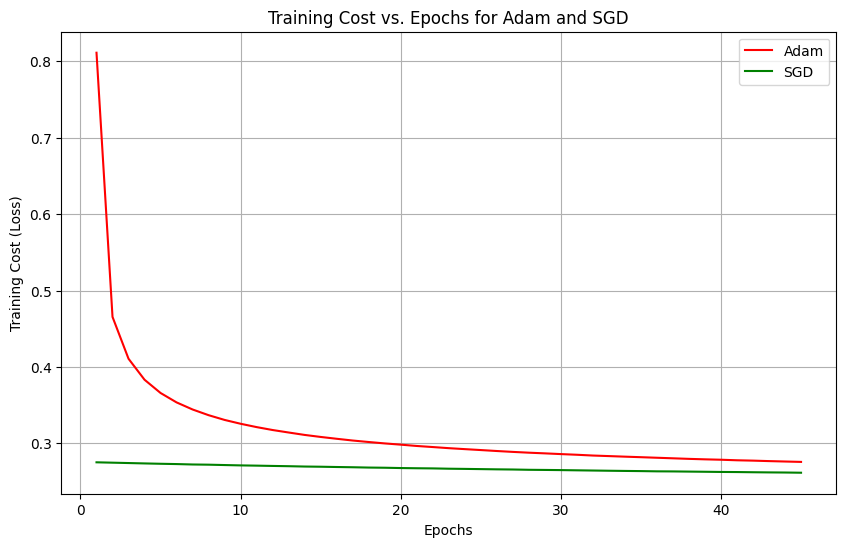

In [33]:
# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('Training Cost vs. Epochs for Adam and SGD')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Extract training cost (loss) values from history
adam_training_costs = history.history['val_loss']
sgd_training_costs = sgd_history.history['val_loss']

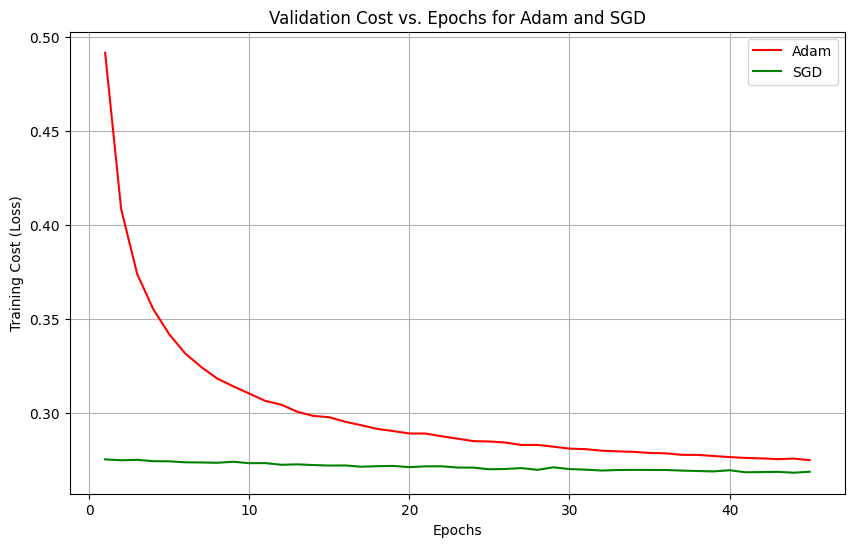

In [35]:
# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('Validation Cost vs. Epochs for Adam and SGD')
plt.legend()
plt.grid(True)
plt.show()

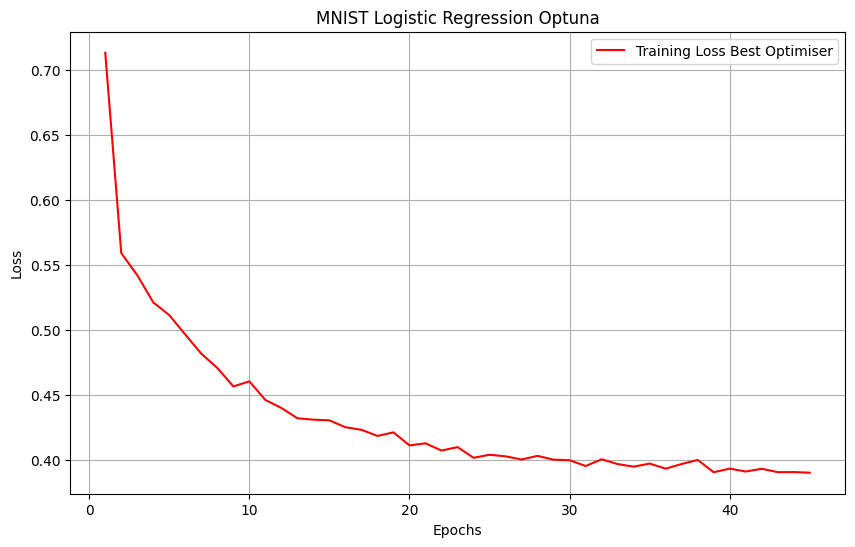

In [73]:
# Plot training cost vs. epochs for the best optimizer
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss Best Optimiser', color='r')
# plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss', color='b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MNIST Logistic Regression Optuna')
plt.legend()
plt.grid(True)
plt.show()

#### Observation Adam vs SGD
As per the paper, we can also observe that fine tuned SGD with momenetum and best hyperparam values outperformed Adam, although adam is found to be the best optimizer.

SGD without fine tuing and static values was not able to converge properly.

## MLP for MNIST

In [55]:
def objective(trial):

  epochs = 45
  # Create and compile the logistic regression model
  optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-2, log=True)
  dropout_rate = trial.suggest_float('dropout_rate', 0.5, 0.6)
  beta_1 = trial.suggest_float('beta_1', 0.0, 0.9)  # Vary beta_1 within [0, 0.9]
  # beta_1 = 0.9
  # beta_2 = 0.99
  beta_2 = trial.suggest_float('beta_2', 0.99, 0.9999)  # Vary beta_2 within [0.99, 0.9999]
  epsilon = trial.suggest_float('epsilon', 1e-8, 1e-7)
  # epsilon = 1e-8
  momentum = trial.suggest_float('momentum', 0.9, 0.99)
  # momentum = 0.9
  l2_reg = trial.suggest_float('l2_reg', 1e-6, 1e-3, log=True)  # L2 regularization strength

  # Implement the learning rate schedule for Adam
  # def learning_rate_schedule(epoch, lr):
      # t = epoch + 1  # Current epoch
      # return initial_learning_rate / math.sqrt(t)

  # decay_steps = len(X_train) // 128  # Adjust as needed
  # decay_steps = epochs  # Adjust as needed
  # lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
  #       learning_rate, decay_steps=decay_steps, decay_rate=1/np.sqrt(epochs), staircase=False
  # )
  # Define the custom learning rate scheduler
  class CustomLRScheduler(tf.keras.callbacks.Callback):
      def on_epoch_begin(self, epoch, logs=None):
          new_lr = 0.001 / np.sqrt(epoch+1)
          K.set_value(self.model.optimizer.lr, new_lr)
          print(f'Epoch {epoch + 1}: Learning Rate = {new_lr}')

  # Binary class
  model = build_multi_layer_perceptrons_model(optimizer_name, trial, learning_rate,
                                          beta_1, beta_2, l2_reg)

  # Create a custom callback to track validation loss
  val_loss_callback = ValidationLoss()
  lr_scheduler_callback = CustomLRScheduler()

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=128,
                      validation_data=(X_test, y_test), verbose=0,
                      callbacks=[val_loss_callback, lr_scheduler_callback])

  # Get the minimum validation loss
  min_val_loss = min(val_loss_callback.validation_losses)

  return min_val_loss

In [56]:
# Create an Optuna study
study_mlp = optuna.create_study(direction='minimize')

# Optimize hyperparameters
# study.optimize(objective, n_trials=45)
study_mlp.optimize(objective, n_trials=1)

best_trial_mlp = study_mlp.best_trial

# Print the best hyperparameters
print(f'Best Optimizer: {best_trial_mlp.params['optimizer']}')
print(f'Best Learning Rate: {best_trial_mlp.params['learning_rate']}')

[I 2023-10-07 17:04:29,555] A new study created in memory with name: no-name-787c1035-de20-48ee-8af0-12324105ca4c


313/313 [==============================] - 3s 7ms/step - loss: 2.8608 - accuracy: 0.1231
MLP - Test Loss: 2.860802412033081, Test Accuracy: 0.12309999763965607
Epoch 1: Learning Rate = 0.001
Epoch 2: Learning Rate = 0.0007071067811865475
Epoch 3: Learning Rate = 0.0005773502691896258
Epoch 4: Learning Rate = 0.0005
Epoch 5: Learning Rate = 0.0004472135954999579
Epoch 6: Learning Rate = 0.0004082482904638631
Epoch 7: Learning Rate = 0.0003779644730092272
Epoch 8: Learning Rate = 0.00035355339059327376
Epoch 9: Learning Rate = 0.0003333333333333333
Epoch 10: Learning Rate = 0.00031622776601683794
Epoch 11: Learning Rate = 0.00030151134457776364
Epoch 12: Learning Rate = 0.0002886751345948129
Epoch 13: Learning Rate = 0.0002773500981126146
Epoch 14: Learning Rate = 0.0002672612419124244
Epoch 15: Learning Rate = 0.0002581988897471611
Epoch 16: Learning Rate = 0.00025
Epoch 17: Learning Rate = 0.000242535625036333
Epoch 18: Learning Rate = 0.00023570226039551587
Epoch 19: Learning Rate = 0

[I 2023-10-07 17:20:49,866] Trial 0 finished with value: 0.09418720006942749 and parameters: {'optimizer': 'adam', 'learning_rate': 0.0030078035155307018, 'dropout_rate': 0.5360351232418614, 'beta_1': 0.060912971518701654, 'beta_2': 0.9976266796097788, 'epsilon': 3.638850233127473e-08, 'momentum': 0.9334336489509198, 'l2_reg': 0.0002975745276878929}. Best is trial 0 with value: 0.09418720006942749.


Best Optimizer: adam
Best Learning Rate: 0.0030078035155307018


In [65]:
# Get the best trial and hyperparameters
best_optimizer_mlp = best_trial_mlp.params['optimizer']
best_lr_mlp = best_trial_mlp.params['learning_rate']
best_beta_1_mlp = best_trial_mlp.params['beta_1']
best_beta_2_mlp = best_trial_mlp.params['beta_2']
best_l2_reg_mlp = best_trial_mlp.params['l2_reg']

In [66]:
# Retrieve and print the best hyperparameters
best_mlp_hyperparameters = best_trial_mlp.params
print("Best Hyperparameters for MLP on MNIST dataset:")
for param_name, param_value in best_mlp_hyperparameters.items():
    print(f"{param_name}: {param_value}")

Best Hyperparameters for MLP on MNIST dataset:
optimizer: adam
learning_rate: 0.0030078035155307018
dropout_rate: 0.5360351232418614
beta_1: 0.060912971518701654
beta_2: 0.9976266796097788
epsilon: 3.638850233127473e-08
momentum: 0.9334336489509198
l2_reg: 0.0002975745276878929


In [67]:
if best_optimizer_mlp == 'adam':
  # Build and train the final model with the best hyperparameters
  best_model = build_multi_layer_perceptrons_model(best_optimizer_mlp, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_mlp, best_beta_2_mlp, best_l2_reg_mlp)
  history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  sgd_model = build_multi_layer_perceptrons_model("sgd", best_trial_mlp, best_lr_mlp,
                                          best_beta_1_mlp, best_beta_2_mlp, best_l2_reg_mlp)

  sgd_history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_training_mlp_costs = history.history['loss']
  sgd_training_mlp_costs = sgd_history.history['loss']

elif best_optimizer_mlp == 'sgd':
  # Build and train the final model with the best hyperparameters
  best_model = build_multi_layer_perceptrons_model(best_optimizer_mlp, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_mlp, best_beta_2_mlp, best_l2_reg_mlp)
  history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_model = build_multi_layer_perceptrons_model("adam", best_trial_mlp, best_lr_mlp,
                                          best_beta_1_mlp, best_beta_2_mlp, best_l2_reg_mlp)

  adam_history = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_training_mlp_costs = adam_history.history['loss']
  sgd_training_mlp_costs = history.history['loss']
else:
    raise ValueError("Invalid optimizer name")

313/313 [==============================] - 2s 7ms/step - loss: 2.8757 - accuracy: 0.1132
MLP - Test Loss: 2.875709295272827, Test Accuracy: 0.11320000141859055
Epoch 1/45
469/469 [==============================] - 26s 54ms/step - loss: 0.7132 - accuracy: 0.8874 - val_loss: 0.5101 - val_accuracy: 0.9366
Epoch 2/45
469/469 [==============================] - 26s 56ms/step - loss: 0.5590 - accuracy: 0.9297 - val_loss: 0.4724 - val_accuracy: 0.9583
Epoch 3/45
469/469 [==============================] - 25s 53ms/step - loss: 0.5420 - accuracy: 0.9342 - val_loss: 0.4637 - val_accuracy: 0.9556
Epoch 4/45
469/469 [==============================] - 26s 56ms/step - loss: 0.5211 - accuracy: 0.9354 - val_loss: 0.4258 - val_accuracy: 0.9644
Epoch 5/45
469/469 [==============================] - 25s 53ms/step - loss: 0.5112 - accuracy: 0.9371 - val_loss: 0.6212 - val_accuracy: 0.8941
Epoch 6/45
469/469 [==============================] - 24s 52ms/step - loss: 0.4963 - accuracy: 0.9370 - val_loss: 0.3926

In [71]:
print(adam_training_mlp_costs)
print(sgd_training_mlp_costs)

[0.713222861289978, 0.5590003728866577, 0.5419694781303406, 0.5210512280464172, 0.5112354755401611, 0.49628153443336487, 0.48153743147850037, 0.4705853760242462, 0.45636844635009766, 0.4602936804294586, 0.4459739029407501, 0.43979865312576294, 0.43190616369247437, 0.43080469965934753, 0.430274099111557, 0.4249860942363739, 0.4229927659034729, 0.418302983045578, 0.4210262894630432, 0.41097506880760193, 0.41261979937553406, 0.4070376753807068, 0.4096870422363281, 0.4014561176300049, 0.40378621220588684, 0.40258780121803284, 0.40015605092048645, 0.40293174982070923, 0.3999958038330078, 0.39957892894744873, 0.39513319730758667, 0.4003044366836548, 0.39664241671562195, 0.3946174681186676, 0.39701932668685913, 0.39308348298072815, 0.3966973125934601, 0.3998142182826996, 0.39033371210098267, 0.39313000440597534, 0.3908863961696625, 0.39301759004592896, 0.3904017508029938, 0.3904514014720917, 0.3899695575237274]
[0.3926064074039459, 0.38499772548675537, 0.38499656319618225, 0.38994643092155457

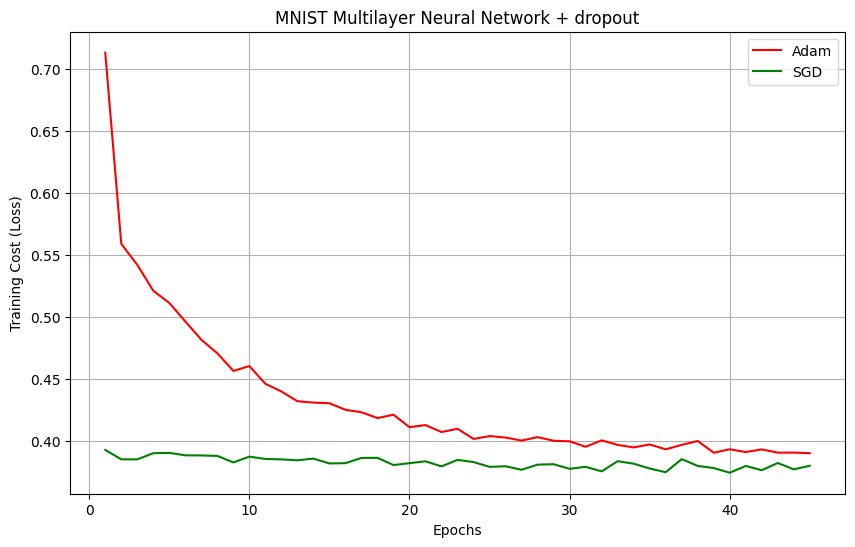

In [69]:
# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_mlp_costs) + 1), adam_training_mlp_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_mlp_costs) + 1), sgd_training_mlp_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('MNIST Multilayer Neural Network + dropout')
plt.legend()
plt.grid(True)
plt.show()

# IMDB Dataset

## Log Reg for IMDB


In [38]:
print(type(x_train_bow), type(x_test_bow))

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>


In [39]:
from scipy.sparse import csr_matrix

x_train_bow = tf.convert_to_tensor(x_train_bow.toarray(), dtype=tf.float32)
x_test_bow = tf.convert_to_tensor(x_test_bow.toarray(), dtype=tf.float32)

In [40]:
# Preprocess the data (pad sequences to a fixed length)
from keras.preprocessing.sequence import pad_sequences
# max_length = 200  # You can adjust this as needed
max_length = max(len(sample) for sample in x_train_bow)
x_train_bow = pad_sequences(x_train_bow, maxlen=max_length, padding='post')

In [41]:
x_test_bow = pad_sequences(x_test_bow, maxlen=max_length, padding='post')

In [42]:
print(np.where(x_train_bow != 0.0))
print(np.where(x_test_bow != 0.0))

(array([    0,     0,     0, ..., 24999, 24999, 24999]), array([ 230,  312,  387, ..., 9541, 9632, 9668]))
(array([    0,     0,     0, ..., 24999, 24999, 24999]), array([ 387,  400,  405, ..., 9444, 9587, 9696]))


In [43]:
def objective(trial):

  epochs = 45
  # Create and compile the logistic regression model
  optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-2, log=True)
  # dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
  beta_1 = trial.suggest_float('beta_1', 0.0, 0.9)  # Vary beta_1 within [0, 0.9]
  beta_2 = trial.suggest_float('beta_2', 0.99, 0.9999)  # Vary beta_2 within [0.99, 0.9999]
  decay = trial.suggest_float('decay', 1e-6, 1e-2, log=True)
  decay_steps = trial.suggest_int('decay_steps', 1, len(x_train_bow) // 128)
  epsilon = trial.suggest_float('epsilon', 1e-9, 1e-7)
  momentum = trial.suggest_float('momentum', 0.9, 0.99)

  # Binary class
  model = build_logistic_regression_bin_model(optimizer_name, trial, learning_rate,
                                          beta_1, beta_2)

  # Define the custom learning rate scheduler
  class CustomLRScheduler(tf.keras.callbacks.Callback):
      def on_epoch_begin(self, epoch, logs=None):
          new_lr = 0.001 / np.sqrt(epoch+1)
          K.set_value(self.model.optimizer.lr, new_lr)
          print(f'Epoch {epoch + 1}: Learning Rate = {new_lr}')

  # Create a custom callback to track validation loss
  val_loss_callback = ValidationLoss()
  lr_scheduler = CustomLRScheduler()

  # Train the model
  history = model.fit(x_train_bow, y_train_bow, epochs=epochs, batch_size=128,
                      validation_data=(x_test_bow, y_test_bow), verbose=0,
                      callbacks=[val_loss_callback, lr_scheduler])

  # Get the minimum validation loss
  min_val_loss = min(val_loss_callback.validation_losses)

  return min_val_loss

In [44]:
# Create an Optuna study
study_lg_imdb = optuna.create_study(direction='minimize')

# Optimize hyperparameters
# study.optimize(objective, n_trials=45)
study_lg_imdb.optimize(objective, n_trials=1)

# Get the best trial and hyperparameters
best_trial_lg_imdb = study_lg_imdb.best_trial
best_optimizer_lg_imdb = best_trial_lg_imdb.params['optimizer']
best_lr_lg_imdb = best_trial_lg_imdb.params['learning_rate']
best_beta_1_lg_imdb = best_trial_lg_imdb.params['beta_1']
best_beta_2_lg_imdb = best_trial_lg_imdb.params['beta_2']

# Print the best hyperparameters
print(f'Best Optimizer: {best_optimizer_lg_imdb}')
print(f'Best Learning Rate: {best_lr_lg_imdb}')

[I 2023-10-07 16:17:37,146] A new study created in memory with name: no-name-a55ef85f-53e1-4f62-8a73-8215047b2c2c


Epoch 1: Learning Rate = 1.0
Epoch 2: Learning Rate = 0.7071067811865475
Epoch 3: Learning Rate = 0.5773502691896258
Epoch 4: Learning Rate = 0.5
Epoch 5: Learning Rate = 0.4472135954999579
Epoch 6: Learning Rate = 0.4082482904638631
Epoch 7: Learning Rate = 0.3779644730092272
Epoch 8: Learning Rate = 0.35355339059327373
Epoch 9: Learning Rate = 0.3333333333333333
Epoch 10: Learning Rate = 0.31622776601683794
Epoch 11: Learning Rate = 0.30151134457776363
Epoch 12: Learning Rate = 0.2886751345948129
Epoch 13: Learning Rate = 0.2773500981126146
Epoch 14: Learning Rate = 0.2672612419124244
Epoch 15: Learning Rate = 0.2581988897471611
Epoch 16: Learning Rate = 0.25
Epoch 17: Learning Rate = 0.24253562503633297
Epoch 18: Learning Rate = 0.23570226039551587
Epoch 19: Learning Rate = 0.22941573387056174
Epoch 20: Learning Rate = 0.22360679774997896
Epoch 21: Learning Rate = 0.2182178902359924
Epoch 22: Learning Rate = 0.21320071635561041
Epoch 23: Learning Rate = 0.20851441405707477
Epoch 24:

[I 2023-10-07 16:21:01,549] Trial 0 finished with value: 16.59992790222168 and parameters: {'optimizer': 'sgd', 'learning_rate': 0.0060180060264529685, 'beta_1': 0.3629224874118513, 'beta_2': 0.9984999619973528, 'decay': 0.004870768621823307, 'decay_steps': 185, 'epsilon': 3.188656906213701e-08, 'momentum': 0.9852339755385909}. Best is trial 0 with value: 16.59992790222168.


Best Optimizer: sgd
Best Learning Rate: 0.0060180060264529685


In [45]:
# Build and train the final model with the best hyperparameters
best_model_lg_imdb = build_logistic_regression_bin_model(best_optimizer_lg_imdb, best_trial_lg_imdb, best_lr_lg_imdb,
                                             best_beta_1_lg_imdb, best_beta_2_lg_imdb)
history_lg_imdb = best_model_lg_imdb.fit(x_train_bow, y_train_bow, epochs=45, batch_size=128,
                        validation_data=(x_test_bow, y_test_bow), verbose=1)

sgd_model = build_logistic_regression_bin_model("adam", best_trial_lg_imdb, best_lr_lg_imdb,
                                             best_beta_1_lg_imdb, best_beta_2_lg_imdb)

sgd_history_lg_imdb = best_model_lg_imdb.fit(x_train_bow, y_train_bow, epochs=45, batch_size=128,
                        validation_data=(x_test_bow, y_test_bow), verbose=1)

sgd_training_mlp_costs = history_lg_imdb.history['loss']
adam_training_mlp_costs = sgd_history_lg_imdb.history['loss']

Epoch 1/45
196/196 [==============================] - 7s 34ms/step - loss: 0.5743 - accuracy: 0.7097 - val_loss: 0.6843 - val_accuracy: 0.5598
Epoch 2/45
196/196 [==============================] - 5s 24ms/step - loss: 0.4726 - accuracy: 0.7883 - val_loss: 0.6872 - val_accuracy: 0.5688
Epoch 3/45
196/196 [==============================] - 11s 55ms/step - loss: 0.4459 - accuracy: 0.8064 - val_loss: 0.6948 - val_accuracy: 0.5660
Epoch 4/45
196/196 [==============================] - 9s 45ms/step - loss: 0.4278 - accuracy: 0.8168 - val_loss: 0.7098 - val_accuracy: 0.5604
Epoch 5/45
196/196 [==============================] - 7s 38ms/step - loss: 0.4152 - accuracy: 0.8241 - val_loss: 0.7238 - val_accuracy: 0.5568
Epoch 6/45
196/196 [==============================] - 7s 38ms/step - loss: 0.3987 - accuracy: 0.8347 - val_loss: 0.7463 - val_accuracy: 0.5547
Epoch 7/45
196/196 [==============================] - 7s 37ms/step - loss: 0.3934 - accuracy: 0.8346 - val_loss: 0.7650 - val_accuracy: 0.550

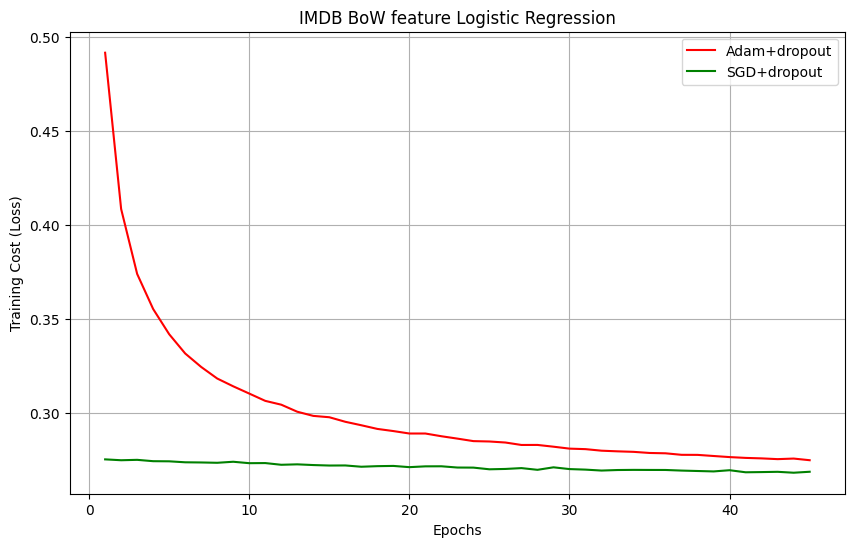

In [46]:

# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam+dropout', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD+dropout', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('IMDB BoW feature Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Retrieve and print the best hyperparameters
best_lg_imdb_hyperparameters = best_trial.params
print("Best Hyperparameters for MLP on IMDB dataset:")
for param_name, param_value in best_lg_imdb_hyperparameters.items():
    print(f"{param_name}: {param_value}")

# Get the best trial and hyperparameters
best_trial_lg_imdb = study.best_trial
best_optimizer_lg_imdb = best_trial.params['optimizer']
best_lr_lg_imdb = best_trial.params['learning_rate']
best_beta_1_lg_imdb = best_trial.params['beta_1']
best_beta_2_lg_imdb = best_trial.params['beta_2']

Best Hyperparameters for MLP on IMDB dataset:
optimizer: sgd
learning_rate: 0.0036132298044764073
beta_1: 0.26108547972311
beta_2: 0.9986691704338064
decay: 4.216458440951901e-06
decay_steps: 152
l2_reg: 3.6376854898462428e-06


In [51]:
# Plot the cost function (loss) versus epoch using Optuna's visualization API
optuna.visualization.plot_optimization_history(study_lg_imdb)

# CIFAR10

## CNN for Cifar10

In [75]:
from keras.datasets import cifar10

In [76]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to [0, 1]

# For RGB images (3 color channels)
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)


170498071/170498071 [==============================] - 5s 0us/step


In [77]:
def objective(trial):

  epochs = 45
  # Create and compile the logistic regression model
  optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'sgd'])
  learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-2, log=True)
  dropout_rate = trial.suggest_float('dropout_rate', 0.5, 0.6)
  beta_1 = trial.suggest_float('beta_1', 0.0, 0.9)  # Vary beta_1 within [0, 0.9]
  # beta_1 = 0.9
  # beta_2 = 0.99
  beta_2 = trial.suggest_float('beta_2', 0.99, 0.9999)  # Vary beta_2 within [0.99, 0.9999]
  epsilon = trial.suggest_float('epsilon', 1e-8, 1e-7)
  # epsilon = 1e-8
  momentum = trial.suggest_float('momentum', 0.9, 0.99)
  # momentum = 0.9
  l2_reg = trial.suggest_float('l2_reg', 1e-6, 1e-3, log=True)  # L2 regularization strength

  # Define the custom learning rate scheduler
  class CustomLRScheduler(tf.keras.callbacks.Callback):
      def on_epoch_begin(self, epoch, logs=None):
          new_lr = 0.001 / np.sqrt(epoch+1)
          K.set_value(self.model.optimizer.lr, new_lr)
          print(f'Epoch {epoch + 1}: Learning Rate = {new_lr}')

  # Binary class
  model = build_cnn_model(optimizer_name, trial, learning_rate,
                          beta_1, beta_2, l2_reg)

  # Create a custom callback to track validation loss
  val_loss_callback = ValidationLoss()
  lr_scheduler_callback = CustomLRScheduler()

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=128,
                      validation_data=(X_test, y_test), verbose=0,
                      callbacks=[val_loss_callback, lr_scheduler_callback])

  # Get the minimum validation loss
  min_val_loss = min(val_loss_callback.validation_losses)

  return min_val_loss

In [ ]:
# Create an Optuna study
study_cnn = optuna.create_study(direction='minimize')

# Optimize hyperparameters
# study.optimize(objective, n_trials=45)
study_cnn.optimize(objective, n_trials=3)

best_trial_cnn = study_cnn.best_trial

# Print the best hyperparameters
print(f'Best Optimizer: {best_trial_cnn.params["optimizer"]}')
print(f'Best Learning Rate: {best_trial_cnn.params["learning_rate"]}')

[I 2023-10-07 19:15:04,314] A new study created in memory with name: no-name-987e31fd-046c-4a32-86ac-a22b10dea2f8


Epoch 1: Learning Rate = 0.001
Epoch 2: Learning Rate = 0.0007071067811865475
Epoch 3: Learning Rate = 0.0005773502691896258
Epoch 4: Learning Rate = 0.0005
Epoch 5: Learning Rate = 0.0004472135954999579
Epoch 6: Learning Rate = 0.0004082482904638631


In [ ]:
# Get the best trial and hyperparameters
best_optimizer_cnn = best_trial_cnn.params['optimizer']
best_lr_cnn = best_trial_cnn.params['learning_rate']
best_beta_1_cnn = best_trial_cnn.params['beta_1']
best_beta_2_cnn = best_trial_cnn.params['beta_2']
best_l2_reg_cnn = best_trial_cnn.params['l2_reg']

In [ ]:
# Retrieve and print the best hyperparameters
best_cnn_hyperparameters = best_trial_mlp.params
print("Best Hyperparameters for CNN on CIFAR10 dataset:")
for param_name, param_value in best_cnn_hyperparameters.items():
    print(f"{param_name}: {param_value}")

In [ ]:
if best_optimizer_cnn == 'adam':
  # Build and train the final model with the best hyperparameters
  best_model_cnn = build_cnn_model(best_optimizer_cnn, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)
  history_cnn = best_model.fit(X_train, y_train, epochs=3, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  sgd_model_cnn = build_cnn_model("sgd", best_trial_cnn, best_lr_cnn,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)

  sgd_history_cnn = best_model.fit(X_train, y_train, epochs=3, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_training_cnn_costs = history_cnn.history['loss']
  sgd_training_cnn_costs = sgd_history_cnn.history['loss']

elif best_optimizer_cnn == 'sgd':
    # Build and train the final model with the best hyperparameters
  best_model_cnn = build_cnn_model(best_optimizer_cnn, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)
  history_cnn = best_model.fit(X_train, y_train, epochs=3, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_model_cnn = build_cnn_model("adam", best_trial_cnn, best_lr_cnn,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)

  adam_history_cnn = best_model.fit(X_train, y_train, epochs=3, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  sgd_training_cnn_costs = history_cnn.history['loss']
  adam_training_cnn_costs = adam_history_cnn.history['loss']
else:
    raise ValueError("Invalid optimizer name")

In [ ]:
# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_cnn_costs) + 1), adam_training_cnn_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_cnn_costs) + 1), sgd_training_cnn_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('CIFAR10 ConvNet First 3 Epoches')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
if best_optimizer_cnn == 'adam':
  # Build and train the final model with the best hyperparameters
  best_model_cnn = build_cnn_model(best_optimizer_cnn, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)
  history_cnn = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  sgd_model_cnn = build_cnn_model("sgd", best_trial_cnn, best_lr_cnn,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)

  sgd_history_cnn = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_training_cnn_costs = history_cnn.history['loss']
  sgd_training_cnn_costs = sgd_history_cnn.history['loss']

elif best_optimizer_cnn == 'sgd':
  # Build and train the final model with the best hyperparameters
  best_model_cnn = build_cnn_model(best_optimizer_cnn, best_trial_mlp, best_lr_mlp,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)
  history_cnn = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  adam_model_cnn = build_cnn_model("adam", best_trial_cnn, best_lr_cnn,
                                          best_beta_1_cnn, best_beta_2_cnn, best_l2_reg_cnn)

  adam_history_cnn = best_model.fit(X_train, y_train, epochs=45, batch_size=128,
                        validation_data=(X_test, y_test), verbose=1)

  sgd_training_cnn_costs = history_cnn.history['loss']
  adam_training_cnn_costs = adam_history_cnn.history['loss']
else:
    raise ValueError("Invalid optimizer name")

In [ ]:
# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_cnn_costs) + 1), adam_training_cnn_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_cnn_costs) + 1), sgd_training_cnn_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('CIFAR10 ConvNet')
plt.legend()
plt.grid(True)
plt.show()

# MISC: Complete implementation  without best optimizer or fine tuning

#### direct values for hyperparameters used as mentioned in the paper


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

# from sklearn.linear_model import SGDClassifier

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, SGD

## MNIST

In [ ]:
# Set hyperparameters
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
num_iterations = 1000

In [ ]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0  # Normalize pixel values to the range [0, 1]
X_test = X_test / 255.0

# Flatten the images for logistic regression
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# function to build and train a logistic regression model
def build_logistic_regression_model(optimizer_name):
    model = Sequential()
    model.add(Flatten(input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=0.001)
    else:
        raise ValueError("Invalid optimizer name")

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train logistic regression models with both Adam and SGD
adam_model = build_logistic_regression_model('adam')
sgd_model = build_logistic_regression_model('sgd')

adam_history = adam_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
sgd_history = sgd_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Extract training cost (loss) values from history
adam_training_costs = adam_history.history['loss']
sgd_training_costs = sgd_history.history['loss']

In [ ]:
# Plot training cost vs. epochs (iterations over the dataset) for both optimizers
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('Training Cost vs. Epochs for Adam and SGD')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to [0, 1]

# For RGB images (3 color channels)
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

# Create CNN model
def build_cnn_model(optimizer_name):
    # Define the CNN architecture
    cnn_model = Sequential([
        Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(64, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(128, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(1000, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes in CIFAR-10
    ])

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    # Compile the model with Adam optimizer
    # adam_optimizer = Adam()
    cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return cnn_model


# Train CNN models with both Adam and SGD
adam_model = build_cnn_model('adam')
sgd_model = build_cnn_model('sgd')

adam_history = adam_model.fit(X_train, y_train, epochs=3, batch_size = 128, validation_data=(X_test, y_test), verbose=0)
sgd_history = sgd_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Extract training cost (loss) values from history
adam_training_costs = adam_history.history['loss']
sgd_training_costs = sgd_history.history['loss']

# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam+dropout', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD+dropout', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('CIFAR10 ConvNet First 3 Epoches')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to [0, 1]

# For RGB images (3 color channels)
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

# Create CNN model
def build_cnn_model(optimizer_name):
    # Define the CNN architecture
    cnn_model = Sequential([
        Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(64, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Conv2D(128, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes in CIFAR-10
    ])

    # Create a custom learning rate schedule that decreases as 1/sqrt(t)
    initial_learning_rate = 0.001
    decay_steps = len(X_train) // 128  # Adjust as needed
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps=decay_steps, decay_rate=1/np.sqrt(45.0), staircase=False
    )

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
    else:
        raise ValueError("Invalid optimizer name")

    # Compile the model with Adam optimizer
    # adam_optimizer = Adam()
    cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return cnn_model


# Train CNN models with both Adam and SGD
adam_model = build_cnn_model('adam')
sgd_model = build_cnn_model('sgd')

adam_history = adam_model.fit(X_train, y_train, epochs=45, batch_size = 128, validation_data=(X_test, y_test), verbose=0)
sgd_history = sgd_model.fit(X_train, y_train, epochs=45, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Extract training cost (loss) values from history
adam_training_costs = adam_history.history['loss']
sgd_training_costs = sgd_history.history['loss']

# Plot training cost vs. epochs for both optimizers
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(adam_training_costs) + 1), adam_training_costs, label='Adam+dropout', color='r')
plt.plot(range(1, len(sgd_training_costs) + 1), sgd_training_costs, label='SGD+dropout', color='g')
plt.xlabel('Epochs')
plt.ylabel('Training Cost (Loss)')
plt.title('CIFAR10 ConvNet')
plt.legend()
plt.grid(True)
plt.show()

## IMDB dataset

# Log_reg from scratch

In [ ]:
# # Load your IMDB BoW features and corresponding labels (X, y)

# # Add a bias term to X
# # X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Assuming X is your feature matrix

# X = x_train_bow
# y = y_train

# # Convert data to TensorFlow tensors
# X_tensor = tf.constant(X, dtype=tf.float32)
# y_tensor = tf.constant(y, dtype=tf.float32)

# # Initialize model parameters (weights and bias)
# num_features = X.shape[1]
# theta = tf.Variable(tf.zeros((num_features, 1), dtype=tf.float32))
# bias = tf.Variable(0.0, dtype=tf.float32)
# # Convert data to TensorFlow tensors
# X_tensor = tf.constant(X_bias, dtype=tf.float32)
# y_tensor = tf.constant(y, dtype=tf.float32)

# # Initialize model parameters (weights and bias)
# num_features = X_bias.shape[1]
# theta = tf.Variable(tf.zeros((num_features, 1), dtype=tf.float32))

# # Set hyperparameters
# learning_rate = 0.001
# beta1 = 0.9
# beta2 = 0.999
# epsilon = 1e-8
# num_iterations = 1000

# # Define the logistic regression model
# def logistic_regression_model(X):
#     logits = tf.matmul(X, theta)
#     return tf.sigmoid(logits)

# # Define the cost function (binary cross-entropy)
# def compute_cost(y_true, y_pred):
#     return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

# # Use the Adam optimizer
# optimizer = tf.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1, beta_2=beta2, epsilon=epsilon)

# # Lists to store costs for plotting
# costs = []

# # Training loop
# for i in range(num_iterations):
#     with tf.GradientTape() as tape:
#         y_pred = logistic_regression_model(X_tensor)
#         cost = compute_cost(y_tensor, y_pred)

#     gradients = tape.gradient(cost, [theta])
#     optimizer.apply_gradients(zip(gradients, [theta]))

#     costs.append(cost.numpy())

# # Plot cost vs. iterations
# plot.figure(figsize=(10, 6))
# plot.plot(range(1, num_iterations + 1), costs, color='b')
# plot.xlabel('Iterations')
# plot.ylabel('Cost')
# plot.title('Training Cost vs. Iterations')
# plot.grid(True)
# plot.show()


# Simple Adam optimiser with Log Reg implementation

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the images (convert 28x28 images to 784-dimensional vectors)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define a simple logistic regression model
model = Sequential()
model.add(Dense(10, input_dim=784, activation='softmax'))  # 10 classes for MNIST

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Extract training cost (loss) values from history
training_costs = history.history['loss']

# Plot training cost vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_costs) + 1), training_costs, color='b')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epochs')
plt.grid(True)
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
